# IMPORTING ESSENTIAL PACKAGES

In [1]:
import os
import librosa
import csv
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

## DATASET SEPERATION

In [2]:
from pydub import AudioSegment

def segment_audio(input_file, output_prefix, segment_duration):
    # Load the audio file
    audio_file = AudioSegment.from_file(input_file)
    
    # Initialize variables
    start_time = 0
    segment_count = 1

    while start_time + segment_duration <= len(audio_file):
        end_time = start_time + segment_duration
        
        # Cut the segment
        segment = audio_file[start_time:end_time]
        
        # Save the segment
        segment.export(f"{output_prefix}_{segment_count}.wav", format="wav")
        
        # Move to the next segment
        start_time = end_time
        segment_count += 1

    # If there's any remaining audio after the last full segment
    if start_time < len(audio_file):
        segment = audio_file[start_time:]
        segment.export(f"{output_prefix}_{segment_count}.wav", format="wav")

# Define the duration of each segment in milliseconds
segment_duration = 10000  # Example: 10 seconds

# Process "m.m4a" file
segment_audio(r'D:\VoiceDetection\voice\m.wav', 'm', segment_duration)

# Process "f.m4a" file
segment_audio(r'D:\VoiceDetection\voice\f.wav', 'f', segment_duration)


# FEATURE EXTRACTION

In [3]:
audio_directory=r'D:\VoiceDetection\voice'
# Get a list of all files in the directory
audio_files = [file for file in os.listdir(audio_directory) if file.endswith('.wav')]
for file in audio_files:
    print(f"Processing {file}...")
    file_path = os.path.join(audio_directory, file)

    # Load the audio file
    try:
        audio_data, sampling_rate = librosa.load(file_path, sr=None, mono=True)
    except Exception as e:
        print(f"Error loading audio file {file}: {e}")
        continue

    # Check if audio data is empty or not
    if audio_data.size == 0:
        print(f"Skipping {file} as the audio data is empty.")
        continue

Processing f.wav...
Processing m.wav...


EXTRACTION OF MFCC FEATURES FROM AUDIO FILES AND ADDING INTO CSV FILES

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
audio_directory = r'D:\VoiceDetection'

# Get a list of all files in the directory
audio_files = [file for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Initialize lists to store extracted features
features = []
labels = []
# ... add other feature lists here for all the attributes you want to extract

# Loop through each audio file and extract features
for file in audio_files:
    print(f"Processing {file}...")
    file_path = os.path.join(audio_directory, file)

    # Load the audio file
    try:
        audio_data, sampling_rate = librosa.load(file_path, sr=None, mono=True)
    except Exception as e:
        print(f"Error loading audio file {file}: {e}")
        continue

    # Check if audio data is empty or not
    if audio_data.size == 0:
        print(f"Skipping {file} as the audio data is empty.")
        continue

    # Extract features using librosa or other methods as required
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sampling_rate)
    meanfreq = spectral_bandwidth.mean(axis=1)
    sd = np.mean(librosa.feature.rms(y=audio_data))
    chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
    median = np.median(chroma_stft)
    q25 = np.percentile(chroma_stft, 25)
    q75 = np.percentile(chroma_stft, 75)
    iqr = q75 - q25
    kurtos = np.mean(kurtosis(chroma_stft, axis=1))
    kurt = kurtos.mean()
    sp_ent = np.mean(librosa.feature.spectral_flatness(y=audio_data))
    sfm = np.mean(librosa.feature.spectral_flatness(y=audio_data))
    centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sampling_rate))
    meanfun = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    minfun = np.min(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    maxfun = np.max(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    meandom = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    mindom = np.min(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    maxdom = np.max(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    dfrange = maxdom - mindom
    modindx = np.mean(librosa.feature.mfcc(y=audio_data, sr=sampling_rate))
    # Determine the label based on the first letter of the file name ('f' for female, 'm' for male)
    label = 'female' if file[0].lower() == 'f' else 'male'

    # Append the extracted features and label to the lists
    features.append([meanfreq, sd, median, q25, q75, iqr, kurt, sp_ent, sfm,
                     centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx])
    labels.append(label)

    columns = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'kurt', 'sp.ent', 'sfm',
           'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
df = pd.DataFrame(features, columns=columns)
df['label'] = labels

# Replace 'path/to/output.csv' with the desired output CSV file path
output_csv_file = 'voice/mfcc_features.csv'

# Write the DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

Processing f_1.wav...
Processing f_10.wav...
Processing f_11.wav...
Processing f_12.wav...
Processing f_13.wav...
Processing f_14.wav...
Processing f_15.wav...
Processing f_16.wav...
Processing f_17.wav...
Processing f_18.wav...
Processing f_19.wav...
Processing f_2.wav...
Processing f_20.wav...
Processing f_21.wav...
Processing f_22.wav...
Processing f_23.wav...
Processing f_24.wav...
Processing f_25.wav...
Processing f_26.wav...
Processing f_27.wav...
Processing f_28.wav...
Processing f_29.wav...
Processing f_3.wav...
Processing f_30.wav...
Processing f_31.wav...
Processing f_32.wav...
Processing f_33.wav...
Processing f_34.wav...
Processing f_35.wav...
Processing f_36.wav...
Processing f_37.wav...
Processing f_38.wav...
Processing f_39.wav...
Processing f_4.wav...
Processing f_40.wav...
Processing f_41.wav...
Processing f_42.wav...
Processing f_43.wav...
Processing f_44.wav...
Processing f_45.wav...
Processing f_46.wav...
Processing f_47.wav...
Processing f_48.wav...
Processing f_49

# DATA PREPROCESSING AS LIKE MACHINE LEARNING

In [2]:
import pandas as pd
df=pd.read_csv("voice/mfcc_features.csv")
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,[3053.39069417],0.101428,0.333990,0.111873,0.621937,0.510064,-0.862283,0.001214,0.001214,3045.325055,-11.537777,-457.14902,213.07199,-11.537777,-457.14902,213.07199,670.22100,-11.537777,female
1,[3048.98737613],0.088650,0.396286,0.155902,0.679933,0.524031,-1.030673,0.000856,0.000856,2654.110366,-10.373816,-458.43488,223.05710,-10.373816,-458.43488,223.05710,681.49194,-10.373816,female
2,[2945.29693808],0.103152,0.353065,0.134765,0.635810,0.501045,-0.868502,0.001237,0.001237,2743.232671,-11.670854,-460.56644,230.10867,-11.670854,-460.56644,230.10867,690.67510,-11.670854,female
3,[2836.18145184],0.113501,0.335479,0.127155,0.631964,0.504808,-0.887899,0.000994,0.000994,2741.581742,-10.191662,-434.73764,223.63165,-10.191662,-434.73764,223.63165,658.36926,-10.191662,female
4,[3399.80672327],0.108234,0.451718,0.214736,0.695563,0.480827,-1.024926,0.001381,0.001381,3546.759491,-10.171392,-379.14352,241.84910,-10.171392,-379.14352,241.84910,620.99260,-10.171392,female
5,[3051.53460494],0.092340,0.380411,0.179174,0.652748,0.473574,-0.785136,0.001030,0.001030,2936.484207,-10.051907,-420.01755,220.09416,-10.051907,-420.01755,220.09416,640.11170,-10.051907,female
6,[3039.37093572],0.121120,0.339883,0.136790,0.625377,0.488587,-0.808261,0.001497,0.001497,3428.924181,-9.601063,-378.89304,211.05743,-9.601063,-378.89304,211.05743,589.95044,-9.601063,female
7,[3059.41062],0.112567,0.348586,0.135071,0.642443,0.507372,-0.880949,0.001306,0.001306,3188.952104,-11.116986,-428.14355,237.42879,-11.116986,-428.14355,237.42879,665.57230,-11.116986,female
8,[3125.47827943],0.097612,0.360461,0.152522,0.651209,0.498687,-0.898279,0.001165,0.001165,3207.315209,-9.415362,-394.64798,214.81491,-9.415362,-394.64798,214.81491,609.46290,-9.415362,female
9,[2964.23158195],0.111358,0.370435,0.146450,0.637695,0.491245,-0.867830,0.001008,0.001008,3074.804698,-8.967942,-436.07278,223.40360,-8.967942,-436.07278,223.40360,659.47640,-8.967942,female


In [3]:
df.shape

(251, 19)

In [4]:
label_value_count=df.label.value_counts()
print(label_value_count)

male      181
female     70
Name: label, dtype: int64


In [5]:
import numpy as np
df['meanfreq'] = df['meanfreq'].apply(lambda x: str(x).replace('[', '').replace(']', ''))

# Convert strings to numeric values
df['meanfreq'] = df['meanfreq'].apply(lambda x: np.fromstring(x, sep=' ').mean())

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,3053.390694,0.101428,0.333990,0.111873,0.621937,0.510064,-0.862283,0.001214,0.001214,3045.325055,-11.537777,-457.14902,213.07199,-11.537777,-457.14902,213.07199,670.22100,-11.537777,female
1,3048.987376,0.088650,0.396286,0.155902,0.679933,0.524031,-1.030673,0.000856,0.000856,2654.110366,-10.373816,-458.43488,223.05710,-10.373816,-458.43488,223.05710,681.49194,-10.373816,female
2,2945.296938,0.103152,0.353065,0.134765,0.635810,0.501045,-0.868502,0.001237,0.001237,2743.232671,-11.670854,-460.56644,230.10867,-11.670854,-460.56644,230.10867,690.67510,-11.670854,female
3,2836.181452,0.113501,0.335479,0.127155,0.631964,0.504808,-0.887899,0.000994,0.000994,2741.581742,-10.191662,-434.73764,223.63165,-10.191662,-434.73764,223.63165,658.36926,-10.191662,female
4,3399.806723,0.108234,0.451718,0.214736,0.695563,0.480827,-1.024926,0.001381,0.001381,3546.759491,-10.171392,-379.14352,241.84910,-10.171392,-379.14352,241.84910,620.99260,-10.171392,female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  251 non-null    float64
 1   sd        251 non-null    float64
 2   median    251 non-null    float64
 3   Q25       251 non-null    float64
 4   Q75       251 non-null    float64
 5   IQR       251 non-null    float64
 6   kurt      251 non-null    float64
 7   sp.ent    251 non-null    float64
 8   sfm       251 non-null    float64
 9   centroid  251 non-null    float64
 10  meanfun   251 non-null    float64
 11  minfun    251 non-null    float64
 12  maxfun    251 non-null    float64
 13  meandom   251 non-null    float64
 14  mindom    251 non-null    float64
 15  maxdom    251 non-null    float64
 16  dfrange   251 non-null    float64
 17  modindx   251 non-null    float64
 18  label     251 non-null    object 
dtypes: float64(18), object(1)
memory usage: 37.4+ KB


In [8]:
non_numeric_meanfreq = df['meanfreq'].apply(lambda x: not isinstance(x, (int, float, np.int_, np.float_)))
print(df[non_numeric_meanfreq])

Empty DataFrame
Columns: [meanfreq, sd, median, Q25, Q75, IQR, kurt, sp.ent, sfm, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, label]
Index: []


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dict = {'label':{'male':1,'female':0}}      
df.replace(dict,inplace = True)  
df['meanfreq'] = df['meanfreq'].astype(float)

In [10]:
df.head(10) #for checking the conversion

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,3053.390694,0.101428,0.333990,0.111873,0.621937,0.510064,-0.862283,0.001214,0.001214,3045.325055,-11.537777,-457.14902,213.07199,-11.537777,-457.14902,213.07199,670.22100,-11.537777,0
1,3048.987376,0.088650,0.396286,0.155902,0.679933,0.524031,-1.030673,0.000856,0.000856,2654.110366,-10.373816,-458.43488,223.05710,-10.373816,-458.43488,223.05710,681.49194,-10.373816,0
2,2945.296938,0.103152,0.353065,0.134765,0.635810,0.501045,-0.868502,0.001237,0.001237,2743.232671,-11.670854,-460.56644,230.10867,-11.670854,-460.56644,230.10867,690.67510,-11.670854,0
3,2836.181452,0.113501,0.335479,0.127155,0.631964,0.504808,-0.887899,0.000994,0.000994,2741.581742,-10.191662,-434.73764,223.63165,-10.191662,-434.73764,223.63165,658.36926,-10.191662,0
4,3399.806723,0.108234,0.451718,0.214736,0.695563,0.480827,-1.024926,0.001381,0.001381,3546.759491,-10.171392,-379.14352,241.84910,-10.171392,-379.14352,241.84910,620.99260,-10.171392,0
5,3051.534605,0.092340,0.380411,0.179174,0.652748,0.473574,-0.785136,0.001030,0.001030,2936.484207,-10.051907,-420.01755,220.09416,-10.051907,-420.01755,220.09416,640.11170,-10.051907,0
6,3039.370936,0.121120,0.339883,0.136790,0.625377,0.488587,-0.808261,0.001497,0.001497,3428.924181,-9.601063,-378.89304,211.05743,-9.601063,-378.89304,211.05743,589.95044,-9.601063,0
7,3059.410620,0.112567,0.348586,0.135071,0.642443,0.507372,-0.880949,0.001306,0.001306,3188.952104,-11.116986,-428.14355,237.42879,-11.116986,-428.14355,237.42879,665.57230,-11.116986,0
8,3125.478279,0.097612,0.360461,0.152522,0.651209,0.498687,-0.898279,0.001165,0.001165,3207.315209,-9.415362,-394.64798,214.81491,-9.415362,-394.64798,214.81491,609.46290,-9.415362,0
9,2964.231582,0.111358,0.370435,0.146450,0.637695,0.491245,-0.867830,0.001008,0.001008,3074.804698,-8.967942,-436.07278,223.40360,-8.967942,-436.07278,223.40360,659.47640,-8.967942,0


In [11]:
x=df.loc[:,df.columns!='label']
y=df.loc[:,'label']

In [12]:
male_features = x[y == 1]
female_features = x[y == 0]
print("Male Features:")
print(male_features)

print("\nFemale Features:")
print(female_features)

Male Features:
        meanfreq        sd    median       Q25       Q75       IQR      kurt  \
70   2964.916889  0.055214  0.444709  0.193303  0.709088  0.515785 -1.103045   
71   2948.648990  0.067249  0.385686  0.142649  0.678616  0.535967 -1.054199   
72   2902.931693  0.041066  0.356569  0.157643  0.648880  0.491237 -0.718159   
73   3328.362314  0.024007  0.527781  0.307440  0.752378  0.444938 -0.855829   
74   2626.463913  0.059349  0.306530  0.120479  0.627758  0.507278 -0.879786   
..           ...       ...       ...       ...       ...       ...       ...   
246  2706.527777  0.054027  0.415541  0.177899  0.696280  0.518381 -1.070149   
247  2758.916297  0.085702  0.275050  0.075749  0.594872  0.519123 -0.656294   
248  2400.526410  0.075777  0.251565  0.093022  0.536746  0.443724 -0.423560   
249  2890.300378  0.048113  0.380215  0.193177  0.647634  0.454457 -0.685351   
250  2399.092846  0.085468  0.270696  0.088403  0.575139  0.486735 -0.631712   

       sp.ent       sfm 

# DATA VISUALISATION TECHNIQUES

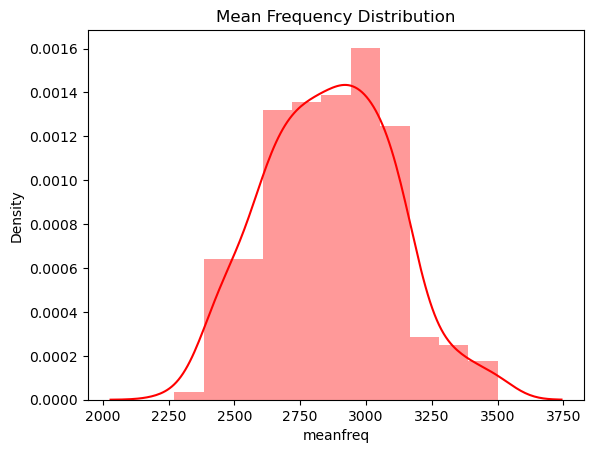

In [13]:
import seaborn as sns
sns.distplot(df["meanfreq"],color='r')
plt.title("Mean Frequency Distribution")
plt.show()

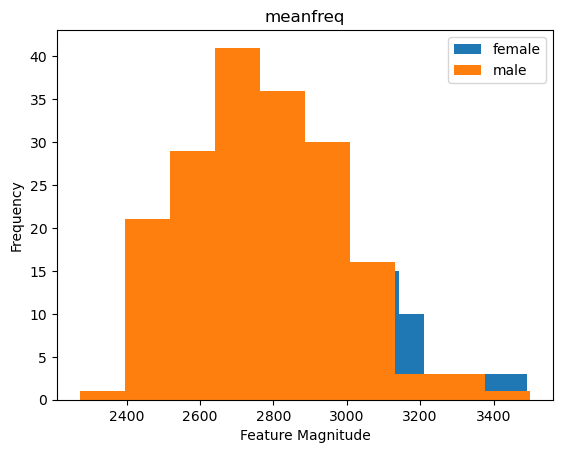

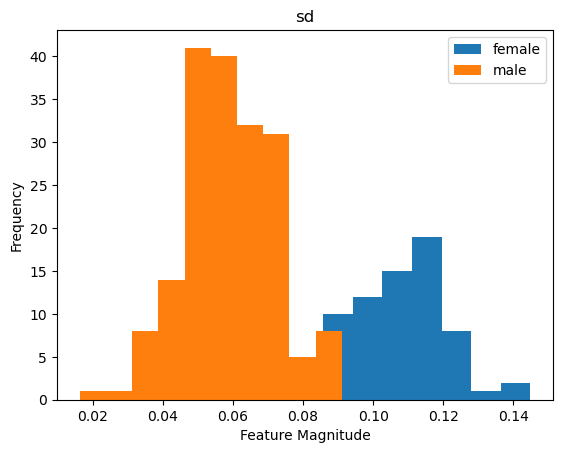

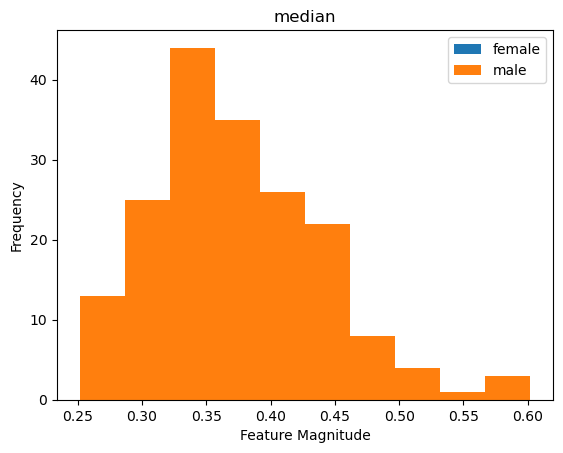

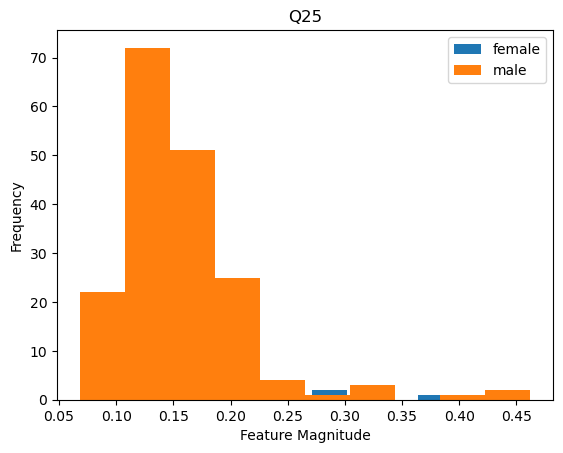

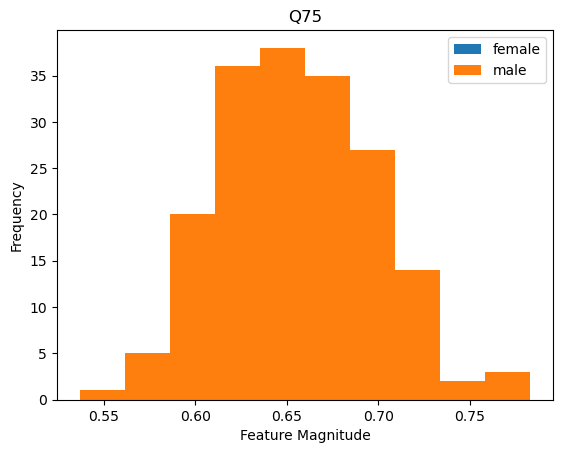

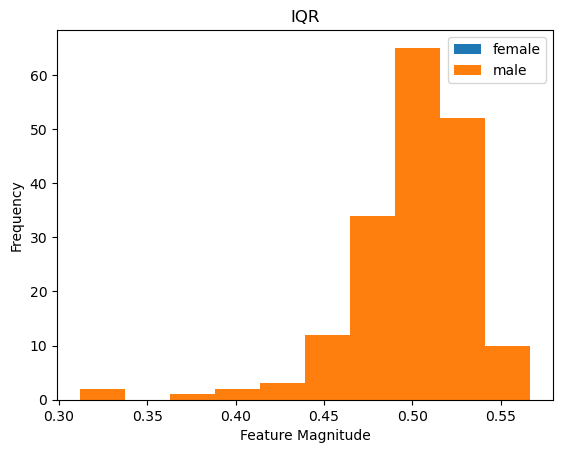

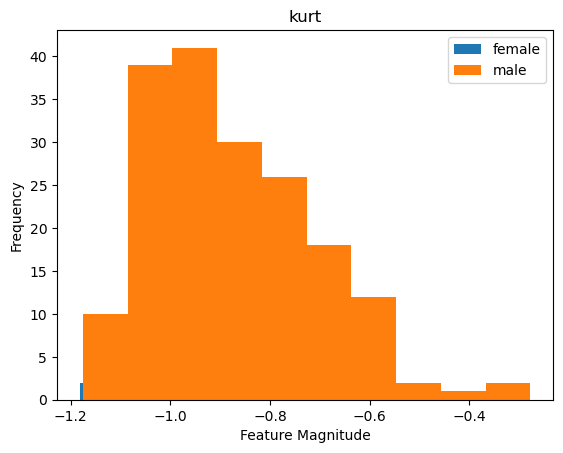

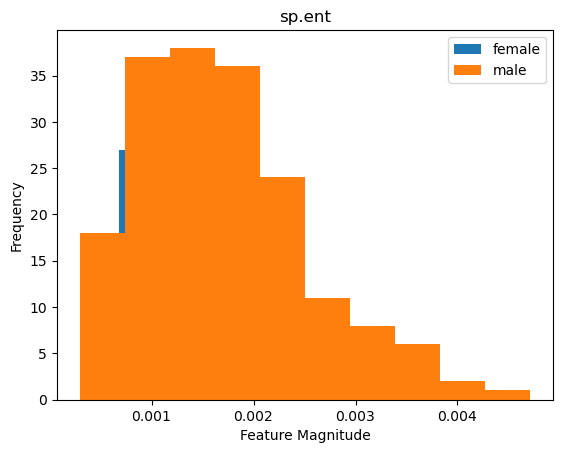

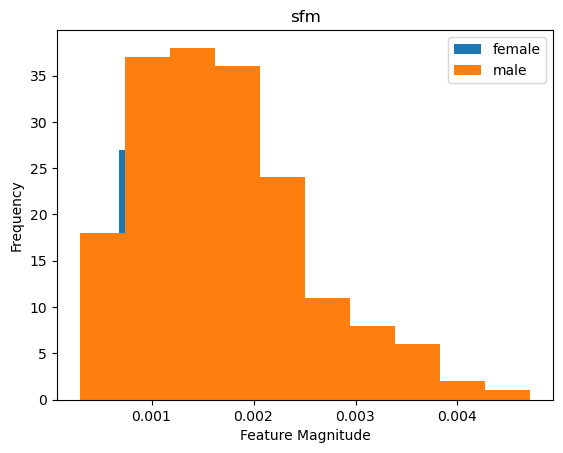

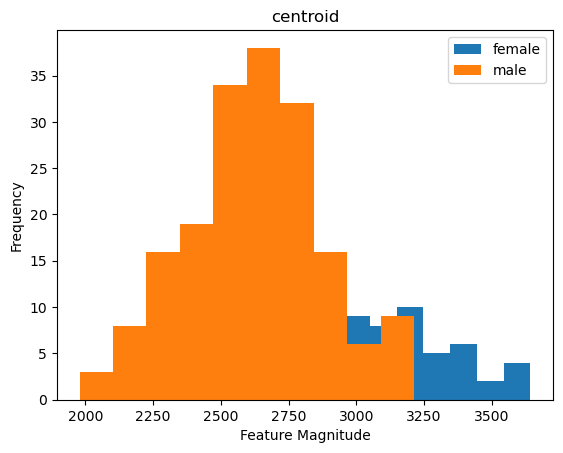

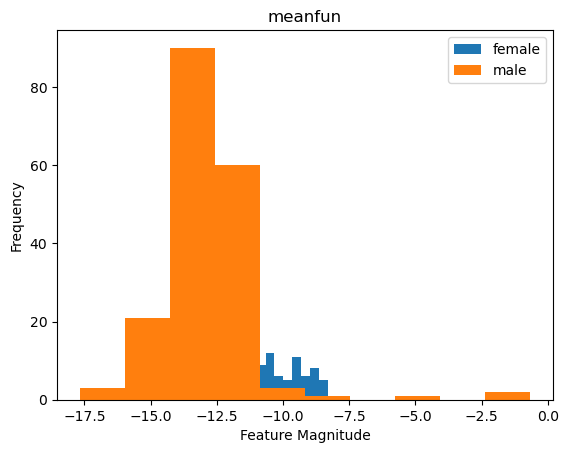

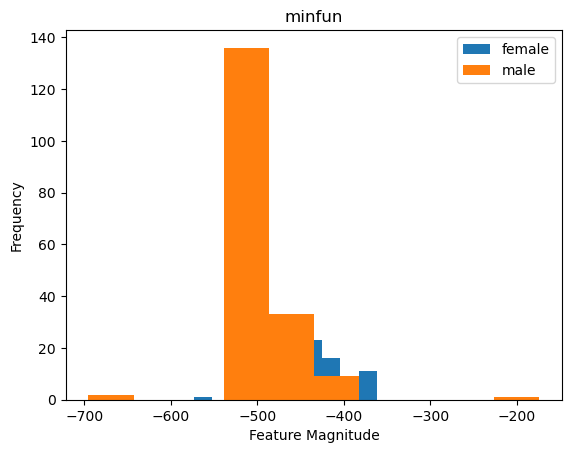

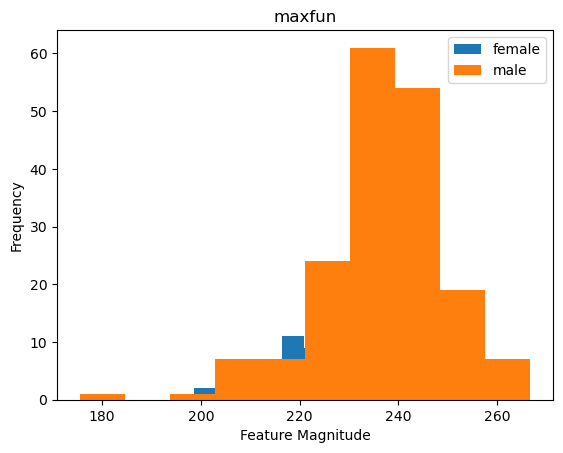

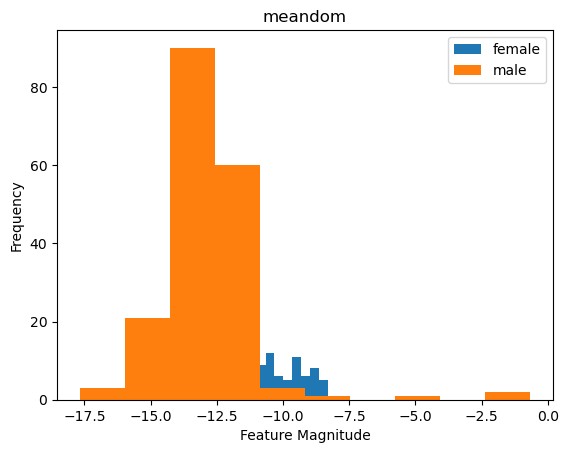

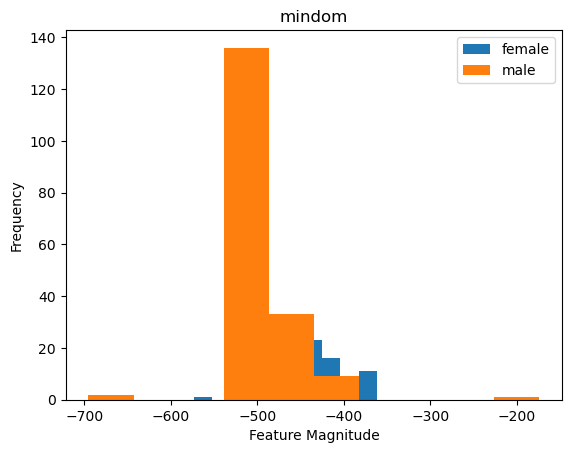

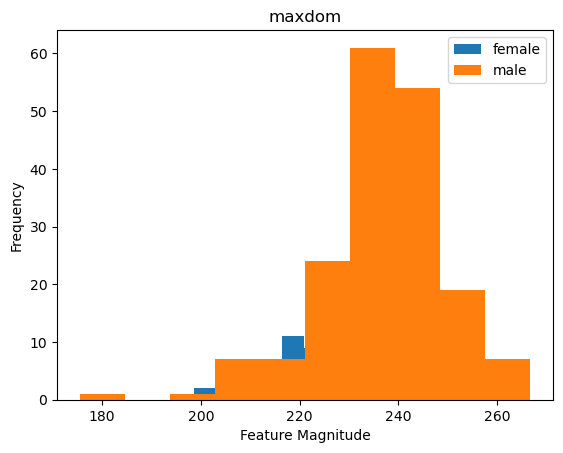

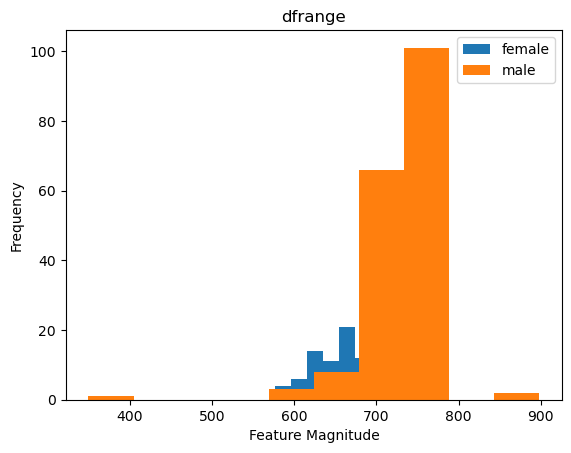

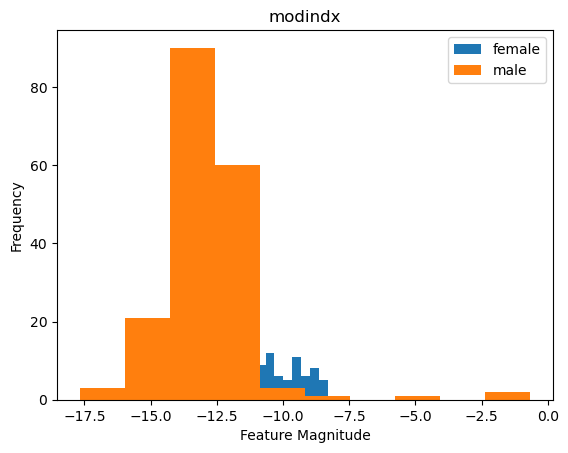

In [14]:
for col in x:
    plt.hist(df.loc[df['label'] == 0,col], label = "female")
    plt.hist(df.loc[df['label'] == 1,col], label = "male")   
    plt.title(col)
    plt.xlabel('Feature Magnitude')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

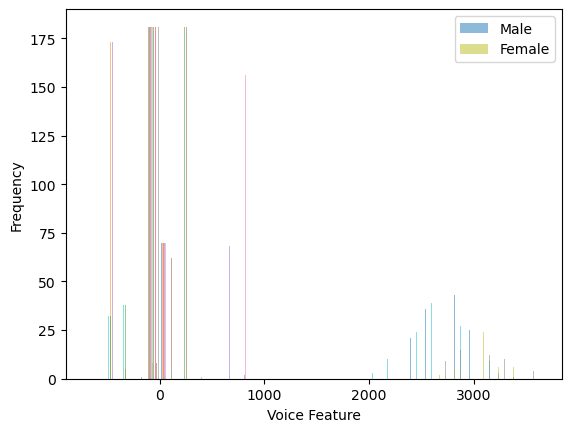

In [15]:
import matplotlib.pyplot as plt

# Assuming you have arrays 'male_features' and 'female_features' for voice features
plt.hist(male_features, bins=30, alpha=0.5, label='Male')
plt.hist(female_features, bins=30, alpha=0.5, label='Female')
plt.xlabel('Voice Feature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

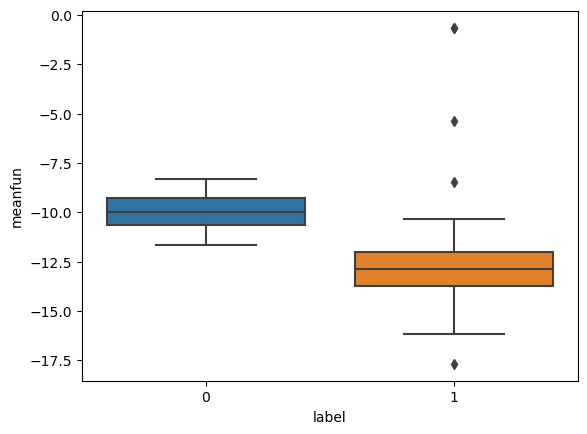

In [16]:
import seaborn as sns
import pandas as pd

sns.boxplot(x='label', y='meanfun', data=df)
plt.show()

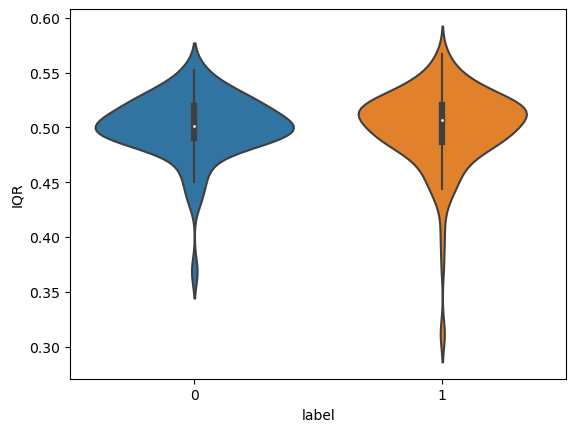

In [17]:
sns.violinplot(x='label', y='IQR', data=df)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)
print(x)

[[ 0.27219305  0.32426912 -0.52969483 ... -0.176021    0.16872975
  -0.27827202]
 [ 0.26503076  0.12556988 -0.1742413  ...  0.04244969  0.20981912
  -0.14154683]
 [ 0.09637134  0.35107403 -0.42085845 ...  0.19673556  0.24329727
  -0.29390397]
 ...
 [-0.78973428 -0.07459528 -1.         ...  0.16686393  0.30304057
  -0.32579924]
 [ 0.00691576 -0.50474582 -0.26594081 ...  0.25408715  0.34265927
  -0.31956535]
 [-0.79206607  0.07609789 -0.89083988 ...  0.34579     0.28473622
  -0.21156317]]


DATA IS SPLITTED INTO TEST AND TRAIN

In [19]:
from sklearn.model_selection import train_test_split
#Dividing into Test and Train 
selected_features=['IQR','meanfreq','kurt','centroid']
x = df[selected_features]
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=7)

# APPLYING VARIOUS MACHINE LEARNING ALGORITHMS

LOGISTIC REGRESSION ALGORITHM

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate accuracy
log_score = accuracy_score(y_test, y_pred)
print("Accuracy:", log_score)

Accuracy: 0.8289473684210527


DECISION TREE CLASSIFIER ALGORITHM

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(x_test)

# Calculate accuracy
dt_score = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_score}')

Decision Tree Accuracy: 0.8026315789473685


GAUSSIAN NB ALGORITHM

In [23]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(x_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(x_test)

# Calculate accuracy
nb_score = accuracy_score(y_test, nb_predictions)
print(f'Naive Bayes Accuracy: {nb_score}')

Naive Bayes Accuracy: 0.8552631578947368


In [24]:
from sklearn.metrics import fbeta_score, recall_score

# Assuming you already have the predictions and true labels stored in y_pred and y_test, respectively

# Calculate F2 score
f2_score_value = fbeta_score(y_test, y_pred, beta=2)

# Calculate recall score
recall_score_value = recall_score(y_test, y_pred)

# Print the scores
print("F2 score:", f2_score_value)
print("Recall score:", recall_score_value)

F2 score: 0.9523809523809523
Recall score: 1.0


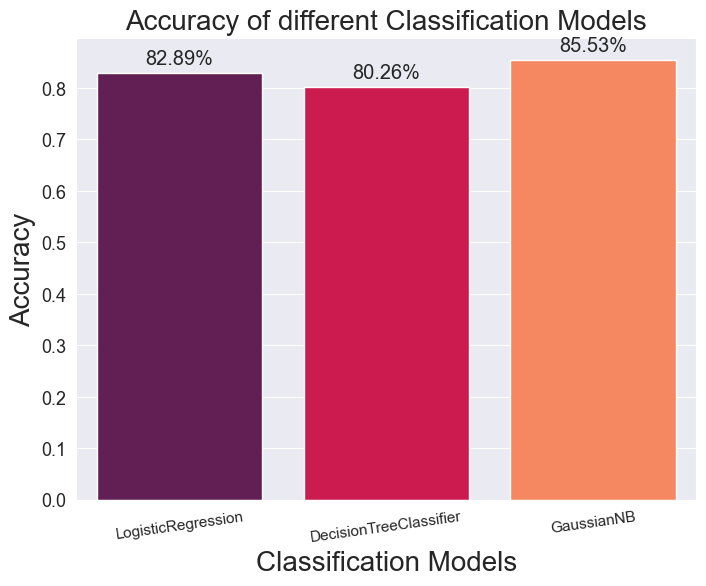

In [25]:
mylist=[]
mylist2=[]
mylist.append(log_score)
mylist2.append("LogisticRegression")
mylist.append(dt_score)
mylist2.append("DecisionTreeClassifier")
mylist.append(nb_score)
mylist2.append("GaussianNB")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# IMPLEMENTATION OF RNN

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [79]:
import librosa
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Load and preprocess audio data
def preprocess_audio(audio_file):
    audio_data, sampling_rate = librosa.load(audio_file, sr=None)
    # Convert audio data to MFCC features
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate)
    return mfcc_features

# Load and preprocess multiple audio files
audio_files = []
for i in range(1, 10):  # Adjust the range as needed
    audio_files.append(f"m_{i}.wav")
    audio_files.append(f"f_{i}.wav")

# Load and preprocess audio files
sequences = []
labels = []

for file in audio_files:
    sequence = preprocess_audio(file)
    sequences.append(sequence)

    if "m_" in file:
        labels.append(0)  # Male label
    else:
        labels.append(1)  # Female label
# Convert sequences into numpy array and create labels
X = np.array(sequences)
y = np.array(labels) # Labels: 0 for male, 1 for female
X.shape

(18, 20, 862)

In [55]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.9268 - accuracy: 0.4545 - val_loss: 0.8360 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 0.3236 - accuracy: 1.0000 - val_loss: 0.8736 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 44ms/step - loss: 0.2175 - accuracy: 1.0000 - val_loss: 0.9046 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1604 - accuracy: 1.0000 - val_loss: 0.9486 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 32ms/step - loss: 0.1337 - accuracy: 1.0000 - val_loss: 0.9967 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1226 - accuracy: 1.0000 - val_loss: 1.0268 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1161 - accuracy: 1.0000 - val_loss: 1.0307 - val_accuracy: 0.3333
Epoch 8/1

# HYPERPARAMETER TUNING - GRIDSEARCH CV & KNN CLASSIFIER

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Reshape X_train to have 2 dimensions
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
# Create a pipeline with MinMaxScaler and KNeighborsClassifier
knn_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])
# Define hyperparameters to search
params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__leaf_size': [15, 20]
}
# Create GridSearchCV instance
gs_knn = GridSearchCV(
    knn_pipe,
    param_grid=params,
    scoring='accuracy',
    cv=5
)
# Fit the grid search to the training data
gs_knn.fit(X_train_reshaped, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gs_knn.best_params_)

# Find the best model's score
best_score = gs_knn.best_score_
print("Best Model's Score:", best_score)

Best hyperparameters: {'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Best Model's Score: 0.9333333333333332


TESTING USING SAME DATA IN THE DATASETS

In [94]:
import librosa
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the best hyperparameters obtained from GridSearchCV
best_hyperparameters = {
    'n_neighbors': 3,
    'weights': 'uniform',
    'leaf_size': 15
}

# Create the pipeline without fitting it
knn_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knn', KNeighborsClassifier(**best_hyperparameters))
])

# Fit the pipeline to the training data
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
knn_pipe.fit(X_train_reshaped, y_train)

# Test the classifier on a new audio file
new_audio_file = 'm_90.wav'  # Replace with the actual path
new_audio_features = preprocess_audio(new_audio_file)
new_audio_features_reshaped = np.reshape(new_audio_features, (1, -1))

# Scale the new audio features using the same scaler
new_audio_features_scaled = knn_pipe.named_steps['mms'].transform(new_audio_features_reshaped)

# Predict the label
predicted_label = knn_pipe.named_steps['knn'].predict(new_audio_features_scaled)

# Print the predicted label (0 for male, 1 for female)
if predicted_label == 0:
    print("Predicted Label: Male")
else:
    print("Predicted Label: Female")

Predicted Label: Male


In [95]:
import librosa
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the best hyperparameters obtained from GridSearchCV
best_hyperparameters = {
    'n_neighbors': 3,
    'weights': 'uniform',
    'leaf_size': 15
}

# Create the pipeline without fitting it
knn_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knn', KNeighborsClassifier(**best_hyperparameters))
])

# Fit the pipeline to the training data
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
knn_pipe.fit(X_train_reshaped, y_train)

# Test the classifier on a new audio file
new_audio_file = 'f_67.wav'  # Replace with the actual path
new_audio_features = preprocess_audio(new_audio_file)
new_audio_features_reshaped = np.reshape(new_audio_features, (1, -1))

# Scale the new audio features using the same scaler
new_audio_features_scaled = knn_pipe.named_steps['mms'].transform(new_audio_features_reshaped)

# Predict the label
predicted_label = knn_pipe.named_steps['knn'].predict(new_audio_features_scaled)

# Print the predicted label (0 for male, 1 for female)
if predicted_label == 0:
    print("Predicted Label: Male")
else:
    print("Predicted Label: Female")

Predicted Label: Female
